# Obliczanie wartości wielomianu interpolacyjnego metodą Lagrange'a

Interpolacja to proces szacowania wartości funkcji w punktach pośrednich na podstawie znanych wartości tej funkcji w
innych punktach. W tym procesie szuka się funkcji, która najlepiej "wpasuje" się w zadane punkty i umożliwi szacowanie wartości funkcji w dowolnym miejscu. Najczęściej stosowaną metodą interpolacji jest interpolacja wielomianowa, polegająca na znalezieniu wielomianu, który przechodzi przez zadane punkty. Interpolacja jest stosowana w wielu dziedzinach, m.in. w matematyce, fizyce, ekonomii czy inżynierii, do analizy danych, aproksymacji funkcji i modelowania zjawisk. Metoda Lagrange'a jest jedną z popularnych metod numerycznych służących do interpolacji funkcji za pomocą wielomianu.

## Wstęp - Kroki obliczeń

Ogólna postać wielomianu interpolacyjnego Lagrange'a wygląda następująco:

![Wzor ogolny](assets/1.png)

Dla 4 punktów wzór interpolacyjny Lagrange'a wygląda następująco:

![Wzor dla 4 punktow](assets/2.png)

Moje podejście do rozwiązania problemu polegało na podzieleniu całego problemu na mniejsze kroki, które są łatwiejsze
do zrozumienia i wykonania. Uzyskane wyniki poszczególnych kroków następnie przechowujemy w tablicach, by później
 wykonać na nich odpowiednie operacje. Ułatwia to zrozumienie procesu oraz umożliwia jego prostą implementację w dowolnym języku programowania.

Poszczególne kroki obliczeń można przedstawić w następujący sposób (tu dla 4 punktów):

### 1. Obliczanie liczników wszystkich wielomianów interpolacyjnych oraz zapisanie ich w tablicy

![Obliczanie licznikow](assets/3.png)

### 2. Obliczanie mianowników wszystkich wielomianów interpolacyjnych oraz zapisanie ich w tablicy

![Obliczanie mianownikow](assets/4.png)

### 3. Podzielenie liczników przez mianowniki

![Podzielenie licznikow przez mianowniki](assets/5.png)

### 4. Pomnożenie wyników z kroku 3 przez wartości funkcji w węzłach interpolacji

![Pomnozenie wynikow z kroku 3 przez wartosci funkcji w wezlach interpolacji](assets/6.png)

### 5. Sumowanie wszystkich wyników z kroku 4

![Sumowanie wszystkich wynikow z kroku 4](assets/7.png)

### 6. Wartość wielomianu interpolacyjnego w punkcie x wynosi sumę z kroku 5

Wyświetlenie wyniku.

## Przykład implementacji metody kroków dla 4 punktów interpolacji w języku Python

### Import bibliotek

In [85]:
import numpy as np
import pandas as pd

### Lista zawierająca punkty pomiarowe stanowiące podstawę obliczeń

In [86]:
pts = np.array([[1,3], [2,1], [3, -1], [4, 2]])
# Transpozycja tablicy, aby punkty były w kolumnach
pts = np.transpose(pts)
# Stworzenie DataFrame z punktami w celu wyświetlenia ich w postaci tabeli
pts_dataframe = pd.DataFrame(pts, columns = np.arange(len(pts[0])), index = ['xᵢ', 'yᵢ'])
print(pts_dataframe)
# Przypisanie wartości z listy do zmiennych w celu łatwiejszego ich wykorzystania
xi = pts[0]
yi = pts[1]

    0  1  2  3
xᵢ  1  2  3  4
yᵢ  3  1 -1  2


### Punkt w którym będziemy szukać wartości wielomianu interpolacyjnego

In [87]:
x = 4

### Krok 1 - Obliczanie liczników wszystkich wielomianów i zapisanie ich do tablicy o nazwie liczniki

In [88]:
# Tablica na wyniki
liczniki = np.array([])
# Iteracja po wszystkich punktach interpolacji - ich indeksach i wartościach
for xindex, xx in enumerate(xi):
    # Tworzymy maskę logiczną, która wybiera wszystkie elementy poza tym o podanym indeksie
    mask = np.arange(len(xi)) != xindex
    # Używamy maski do wybrania wszystkich elementów poza tym o podanym indeksie
    elements_except_current = xi[mask]
    # Obliczamy licznik - jest to iloczyn wyników odejmowania od wartości x wszystkich innych wartości xi poza tym o
    # podanym indeksie
    top = np.prod(x - elements_except_current)
    # Dodajemy licznik do tablicy wyników
    liczniki = np.append(liczniki, top)

print('Tablica z licznikami: ', liczniki)

Tablica z licznikami:  [0. 0. 0. 6.]


### Krok 2 - Obliczanie mianowników wszystkich wielomianów i zapisanie ich do tablicy o nazwie mianowniki

In [89]:
# Tablica na wyniki
mianowniki = np.array([])
# Iteracja po wszystkich punktach interpolacji - ich indeksach i wartościach
for xindex, xx in enumerate(xi):
   # Tworzymy maskę logiczną, która wybiera wszystkie elementy poza tym o podanym indeksie
   x_other_than_curr = xi[np.arange(len(xi)) != xindex]
   # Obliczamy mianownik - jest to iloczyn wyników odejmowania aktualnej wartości xi od wszystkich innych wartości xi
   bottom = np.prod(xx - xi[np.arange(len(xi)) != xindex])
    # Dodajemy mianownik do tablicy wyników
   mianowniki = np.append(mianowniki, bottom)

print('Tablica z mianownikami: ', mianowniki)

Tablica z mianownikami:  [-6.  2. -2.  6.]


### Krok 3 - Podzielenie liczników przez mianowniki

In [90]:
# Obliczamy wynik dzielenia liczników przez mianowniki
wyniki_dzielenia = np.divide(liczniki, mianowniki)

### Krok 4 - Pomnożenie wyników z kroku 3 przez wartości funkcji w węzłach interpolacji

In [91]:
poszczegolne_skladniki = (yi * wyniki_dzielenia)
print('poszczegolne_skladniki', poszczegolne_skladniki)

poszczegolne_skladniki [-0.  0.  0.  2.]


### Wyświetlenie wartości wielomianu interpolacyjnego w punkcie x

In [92]:
print('Wartość wielomianu interpolacyjnego w punkcie x = ', x, ' wynosi: ', np.sum(poszczegolne_skladniki))

Wartość wielomianu interpolacyjnego w punkcie x =  4  wynosi:  2.0


## Stworzenie ogólnej funkcji obliczającej wartość wielomianu interpolacyjnego w punkcie x

In [93]:
def lagrange(coordinates_list: list[tuple[int, int]], x):
    pts = np.array(coordinates_list)
    # Transpozycja tablicy, aby punkty były w kolumnach
    pts = np.transpose(pts)
    # Przypisanie wartości z listy do zmiennych w celu łatwiejszego ich wykorzystania
    xi = pts[0]
    yi = pts[1]
    print(xi)
    print(yi)

    # Tablica na wyniki
    nominators = np.array([])
    # Iteracja po wszystkich punktach interpolacji - ich indeksach i wartościach
    for xindex, xx in enumerate(xi):
        # Tworzymy maskę logiczną, która wybiera wszystkie elementy poza tym o podanym indeksie
        mask = np.arange(len(xi)) != xindex
        # Używamy maski do wybrania wszystkich elementów poza tym o podanym indeksie
        elements_except_current = xi[mask]
        # Obliczamy licznik - jest to iloczyn wyników odejmowania od wartości x wszystkich innych wartości xi poza tym o
        # podanym indeksie
        top = np.prod(x - elements_except_current)
        # Dodajemy licznik do tablicy wyników
        nominators = np.append(nominators, top)

    # Tablica na wyniki
    denominators = np.array([])
    # Iteracja po wszystkich punktach interpolacji - ich indeksach i wartościach
    for xindex, xx in enumerate(xi):
       # Tworzymy maskę logiczną, która wybiera wszystkie elementy poza tym o podanym indeksie
       x_other_than_curr = xi[np.arange(len(xi)) != xindex]
       # Obliczamy mianownik - jest to iloczyn wyników odejmowania aktualnej wartości xi od wszystkich innych wartości xi
       bottom = np.prod(xx - xi[np.arange(len(xi)) != xindex])
        # Dodajemy mianownik do tablicy wyników
       denominators = np.append(denominators, bottom)

    division_result = np.divide(nominators, denominators)
    terms = (yi * division_result)
    return np.sum(terms)

### Wywołanie funkcji i sprawdzenie poprawności działania

In [94]:
x = 4
coords = [[1,3], [2,1], [3, -1], [4, 2]]
print('Wartość wielomianu interpolacyjnego w punkcie x = ', x, ' wynosi: ', lagrange(coords, 4))

[1 2 3 4]
[ 3  1 -1  2]
Wartość wielomianu interpolacyjnego w punkcie x =  4  wynosi:  2.0


## Użycie biblioteki symPy w celu obliczenia wzoru na wielomian interpolacyjny

Biblioteka ta pozwala na podstawienie wartości symboli w wyrażeniu matematycznym, a także na wyświetlenie tego
wyrażenia w postaci uproszczonego wzoru matematycznego.

In [95]:
import sympy as sp
x = sp.symbols('x')
wyn = lagrange(coords, x)
print(sp.simplify(wyn))

[1 2 3 4]
[ 3  1 -1  2]
x*(0.833333333333333*x**2 - 5.0*x + 7.16666666666667)


## Wyświetlenie wykresu wielomianu interpolacyjnego

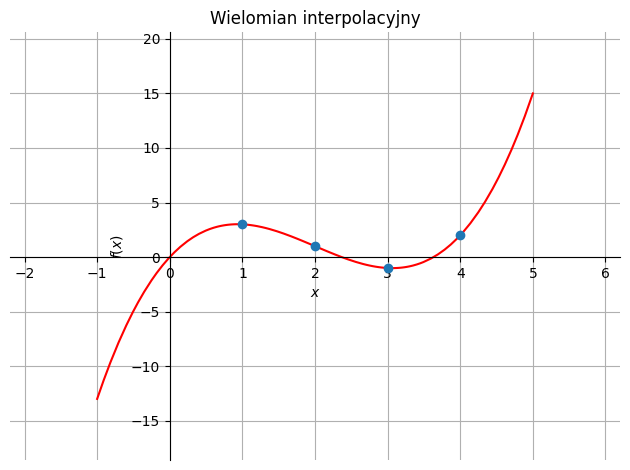

In [97]:
from sympy.plotting.plot import MatplotlibBackend, Plot

# funkcja zwracająca wykres z biblioteki sympy
# Używana z powodu konieczności połączenia wielu wykresów w jeden
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

p1 = sp.plot(wyn, (x, -1, 5),  show=False, line_color='red')
p1.title = 'Wielomian interpolacyjny'
p1.margin = 0.2
fig, axe = get_sympy_subplots(p1)
# Dodatkowe wykresy-tu punkty interpolacji
axe.plot(xi, yi, "o")
axe.grid()

